In [3]:
'''
@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained 
                                      global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}
'''
from bayes_opt import BayesianOptimization

def black_box_function(x, y):
    return -x ** 2 - (y - 1) ** 2 + 1

pbounds = {'x': (2, 4), 'y': (-3, 3)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | -7.135    | 2.834     | 1.322     |
| 2         | -7.78     | 2.0       | -1.186    |
| 3         | -7.11     | 2.218     | -0.7867   |
| 4         | -12.4     | 3.66      | 0.9608    |
| 5         | -6.999    | 2.23      | -0.7392   |


In [4]:
'''
@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained 
                                      global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}
'''
print(optimizer.max)

{'target': -6.999472814518675, 'params': {'x': 2.2303920156083024, 'y': -0.7392021938893159}}


In [5]:
'''
@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained 
                                      global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}
'''
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': -7.135455292718879, 'params': {'x': 2.8340440094051482, 'y': 1.3219469606529488}}
Iteration 1: 
	{'target': -7.779531005607566, 'params': {'x': 2.0002287496346898, 'y': -1.1860045642089614}}
Iteration 2: 
	{'target': -7.109925819441113, 'params': {'x': 2.2175526295255183, 'y': -0.7867249801593896}}
Iteration 3: 
	{'target': -12.397162416009818, 'params': {'x': 3.660003815774634, 'y': 0.9608275029525108}}
Iteration 4: 
	{'target': -6.999472814518675, 'params': {'x': 2.2303920156083024, 'y': -0.7392021938893159}}


In [6]:
'''
@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained 
                                      global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}
'''
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

optimizer.maximize(
    init_points=0,
    n_iter=5,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 6         | -2.942    | 1.98      | 0.8567    |
| 7         | -0.4597   | 1.096     | 1.508     |
| 8         | 0.5304    | -0.6807   | 1.079     |
| 9         | -5.33     | -1.526    | 3.0       |
| 10        | -5.419    | -2.0      | -0.5552   |


In [7]:
'''
@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained 
                                      global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}
'''
optimizer.probe(
    params={"x": 0.5, "y": 0.7},
    lazy=True,
)

optimizer.probe(
    params=[-0.3, 0.1],
    lazy=True,
)

optimizer.maximize(init_points=0, n_iter=0)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 11        | 0.66      | 0.5       | 0.7       |
| 12        | 0.1       | -0.3      | 0.1       |


In [8]:
'''
@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained 
                                      global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}
'''
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

logger = JSONLogger(path="./bayesian/logs.json")
optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 13        | -12.48    | -1.266    | -2.446    |


FileNotFoundError: [Errno 2] No such file or directory: './bayesian/logs.json'

In [ ]:
'''
@Misc{,
    author = {Fernando Nogueira},
    title = {{Bayesian Optimization}: Open source constrained 
                                      global optimization tool for {Python}},
    year = {2014--},
    url = " https://github.com/fmfn/BayesianOptimization"
}
'''
from bayes_opt.util import load_logs

new_optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds={"x": (-2, 2), "y": (-2, 2)},
    verbose=2,
    random_state=7,
)

load_logs(new_optimizer, logs=["./bayesian/logs.json"])

new_optimizer.maximize(
    init_points=2,
    n_iter=3,
)

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
rv = norm(loc = 170, scale = 7) #평균 170이고 표준편차 7인 정규분포 객체 만들기
x = np.arange(150, 190, 0.2) #X 확률변수 범위
y = rv.pdf(x) #X 범위에 따른 정규확률밀도값
fig, ax = plt.subplots(1,1) 
ax.plot(x, y,'bo', ms=2, label = 'normal pdf')
ax.vlines(x, 0, y, colors='w', lw =5, alpha =0.5) #결과는
ax.set_ylim([0,.4]) #y축 범위

(0.0, 0.4)

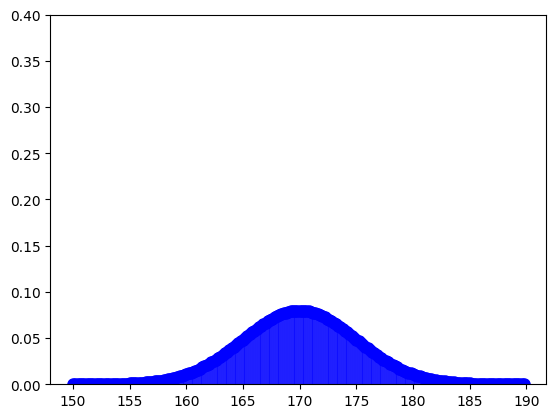

In [9]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
rv = norm(loc = 170, scale = 5) #평균 0이고 표준편차 1인 정규분포 객체 만들기
x = np.arange(150, 190, 0.2) #X 확률변수 범위
y = rv.pdf(x) #X 범위에 따른 정규확률밀도값
fig, ax = plt.subplots(1,1) 
ax.plot(x, y,'bo', ms=8, label = 'normal pdf')
ax.vlines(x, 0, y, colors='b', lw =5, alpha =0.5) #결과는
ax.set_ylim([0,.4]) #y축 범위

(0.0, 0.4)

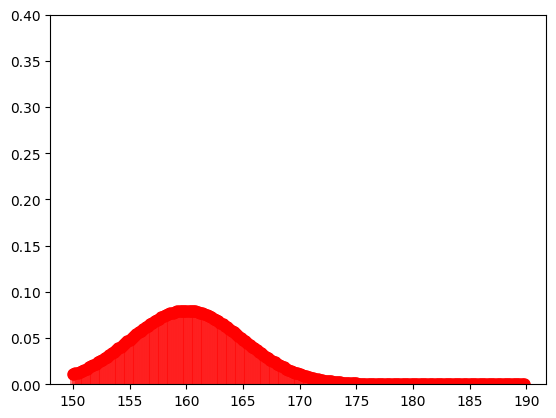

In [10]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
rv = norm(loc = 160, scale = 5) #평균 0이고 표준편차 1인 정규분포 객체 만들기
x = np.arange(150, 190, 0.2) #X 확률변수 범위
y = rv.pdf(x) #X 범위에 따른 정규확률밀도값
fig, ax = plt.subplots(1,1) 
ax.plot(x, y,'ro', ms=8, label = 'normal pdf')
ax.vlines(x, 0, y, colors='r', lw =5, alpha =0.5) #결과는
ax.set_ylim([0,.4]) #y축 범위

(0.0, 0.4)

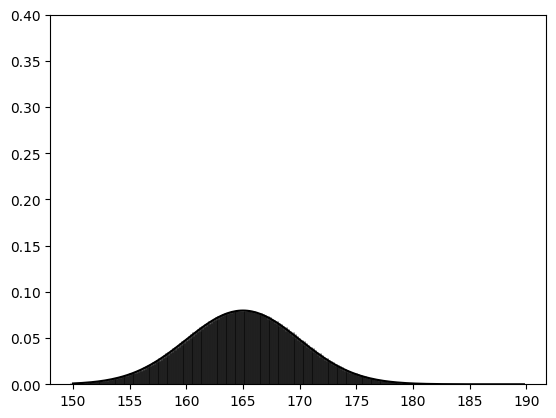

In [11]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
rv = norm(loc = 165, scale = 5) #평균 0이고 표준편차 1인 정규분포 객체 만들기
x = np.arange(150, 190, 0.2) #X 확률변수 범위
y = rv.pdf(x) #X 범위에 따른 정규확률밀도값
fig, ax = plt.subplots(1,1) 
ax.plot(x, y,color='black', ms=8, label = 'normal pdf')
ax.vlines(x, 0, y, colors='black', lw =5, alpha =0.5) #결과는
ax.set_ylim([0,.4]) #y축 범위